### Кросс-валидация

#### Цель работы

Познакомиться с основными типами разбиений данных при осуществлении кросс-валидации с использованием библиотеки sklearn.

#### Задания для выполнения

1. Загрузите датасет ирисы Фишера из библиотеки `sklearn.datasets`. 
3. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.
4. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра `random_state=42` и выведите на экран соответствующие индексы разбиения.
5. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик `accuracy` и `f1-score`.
6. Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.
7. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.
1. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию `cross_val_score`. Убедитесь, что получится тот же результат.
8.  Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.
9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

#### Методические указания

Для данной лабораторной работы будем использовать известный датасет "Ирисы Фишера". Загружаем данные:

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X=iris.data
y=iris.target

Выведите получившиеся данные на экран. Можно увидет, что данные хранятся в обычных массивах. Кроме самих данных в датасете присутствует дополнительная информация и описание данных. Познакомьтесь со структурой датасета.

Можно преобразовать данные для наглядности в DataFrame:

In [5]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Тестовая выборка

Для более правильного оценивания эффективности работы моделей разобьем исходную выборку на две части: тренировочную и тестовую:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

В данном случае мы резервируем 15% данных для тестовой выборки.

Обучим модель логистической регрессии и выведем значения метрик:

In [7]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.8000000000000002


Видим, что модель обучилась до уровня точности 91%. Насколько это хорошо, судить сложно, надо сравнивать с результативностью других моделей. Для более наглядного представления результата можно вывести отчет о классификации:

<Axes: >

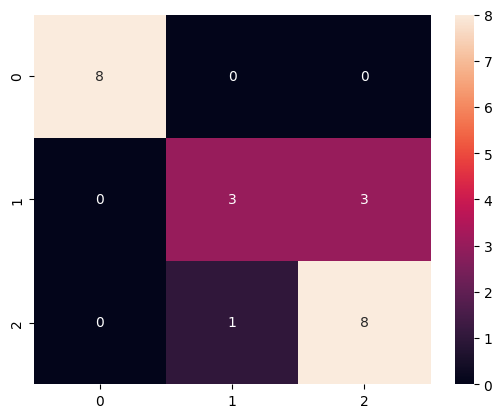

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Но заметим, что эта оценка производилась именно при данном разбиении. Что будет, если мы сделаем другое разбиение датасета на две части? Давайте повторим разбиение с другим значением _random_state_, обучим другую модель и выведем те же метрики:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


Теперь получается, что модель обучилась идеально. Это же подтверждает и матрица:

<Axes: >

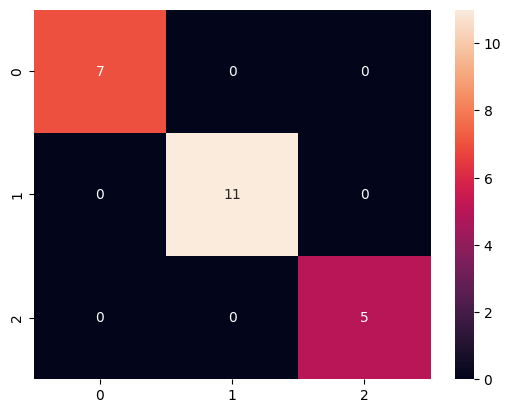

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Можно повторять эту процедуру несколько раз и каждый раз будут получаться разные значения метрик. Например при таком разбиении модель обучается гораздо хуже:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

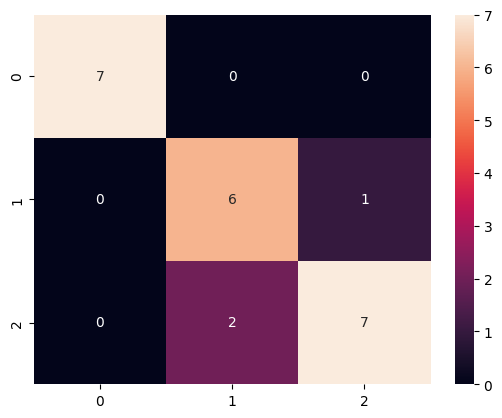

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Для устранения этих случайных колебаний и нужна перекрестная проверка или кросс-валидация.

#### Перекрестная проверка

Оценим работу построенной модели с помощью перекрёстной проверки.

Импортируем нужные библиотеки:

In [13]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

##### k-fold разбиение

В k-блочной перекрёстной проверке исходные данные разбиваются на $k$ (примерно) равных по количеству частей, называемых "блоками", на  𝑘−1  из которых производится обучение, а на  1  валидация. В результате получается более робастная оценка эффективности выбранной модели.

Создаём k-блочное разбиение (KFold):

In [14]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

Метод  `split()` - возвращает индексы разбиения:

Сделаем разбиение на блоки:

In [15]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

Сделаем кросс-валидацию:

In [16]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

Выведем соответствующие массивы с метриками:

In [17]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


Выведем среднее значение метрики:

In [18]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


Это и будет наша кросс-валидированная оценка метрики. Она гораздо ближе к истинному уровню эффективности модели за счет того, что все случайные ошибки выборки усредняются. Можно еще вывести дисперсию данной оценки, которая показывает степень уверенности в ней:

In [19]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


Выполняем кросс-валидацию с помощью функции cross_val_score:

In [20]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


Этот код делает примерно то же, что и предыдущий, но автоматически, с использованием библиотечной функции.

Валидация по К-блокам (фолдам) - это самый распространенный алгоритм разбиения датасета на блоки. Он является золотым стандартом в научных исследованиях.

##### Stratified k-Fold

Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество.
Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов.

Создаём стратифицированное k-блочное разбиение (StratifiedKFold):

In [21]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

Выведем разбиение на блоки:

In [22]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

Выполняем кросс-валидацию с помощью функции cross_val_score:

In [23]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


##### Leave-one-out

Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.

Создаём разбиение:

In [24]:
loo = LeaveOneOut()

Сделаем разбиение на блоки:

In [25]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [26]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


#### Контрольные вопросы

1. Зачем нужно применять кросс-валидацию?
2. В чём заключается процесс кросс-валидации?
3. . В чем достоинства и недостатки каждого метода кросс-валидации?
4. Какой метод кросс-валидации можно применять на данных с большим дисбалансом классов?
5. Можно ли бороться с недообучением при помощи кросс-валидации? А с переобучением?
6. Какие основные типы разбиений данных используются при кросс-валидации?
7. Какой тип кросс-валидации можно применять есть нужно сделать очень большое количество проходов?

#### Дополнительные задания

In [27]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_diabetes
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                     LeaveOneOut, LeavePOut, cross_validate, cross_val_score)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

##### 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [28]:
iris = load_iris()
X, y = iris.data, iris.target


lpo = LeavePOut(p=2)
# Поскольку число разбиений (C(150,2)=11175) велико, выводим первые 3 разбиения
for i, (train_idx, test_idx) in enumerate(lpo.split(X)):
    if i < 3:
        print(f"\nРазбиение {i+1}:")
        print("  Обучающие индексы:", train_idx)
        print("  Тестовые индексы:", test_idx)
    else:
        break


Разбиение 1:
  Обучающие индексы: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Тестовые индексы: [0 1]

Разбиение 2:
  Обучающие индексы: [  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  

##### 2. Изучите функцию  cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [29]:
model_lr = LogisticRegression(solver='liblinear')
# Оцениваем по метрикам accuracy и f1_macro, проводим 3‑кратную кросс-валидацию
scoring = ['accuracy', 'f1_macro']
cv_results = cross_validate(model_lr, X, y, cv=3, scoring=scoring, return_train_score=True)
print("Результаты cross_validate для Logistic Regression:")
for key in cv_results:
    print(f"{key}: {cv_results[key]}")

Результаты cross_validate для Logistic Regression:
fit_time: [0.00099993 0.00100017 0.        ]
score_time: [0.00200009 0.00099993 0.00199962]
test_accuracy: [0.96 0.96 0.94]
train_accuracy: [0.95 0.96 0.97]
test_f1_macro: [0.95955882 0.95955882 0.94071491]
train_f1_macro: [0.94984655 0.96019014 0.96963423]


##### 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [30]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results_metrics = cross_validate(model_lr, X, y, cv=3, scoring=scoring)
for metric in scoring:
    mean_val = np.mean(cv_results_metrics['test_' + metric])
    print(f"Среднее значение {metric}: {mean_val:.3f}")


Среднее значение accuracy: 0.953
Среднее значение precision_macro: 0.958
Среднее значение recall_macro: 0.954
Среднее значение f1_macro: 0.953


##### 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [31]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, mdl in models.items():
    scores = cross_val_score(mdl, X, y, cv=3, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{name}: accuracy = {mean_score:.3f} (+/- {std_score:.3f})")

Logistic Regression: accuracy = 0.953 (+/- 0.009)
KNN: accuracy = 0.980 (+/- 0.000)
Decision Tree: accuracy = 0.960 (+/- 0.028)


##### 5. Повторите анализ на другом датасете: встроенном наборе данных о [диабете](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [32]:
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

model_reg = LinearRegression()
# Оцениваем по метрикам R² и среднеквадратичной ошибке (MSE) с использованием 5‑кратной кросс-валидации.
scoring_reg = ['r2', 'neg_mean_squared_error']
cv_results_diabetes = cross_validate(model_reg, X_diabetes, y_diabetes, cv=5, scoring=scoring_reg)
mean_r2 = np.mean(cv_results_diabetes['test_r2'])
mean_mse = -np.mean(cv_results_diabetes['test_neg_mean_squared_error'])
print("Результаты для Linear Regression на диабетах:")
print(f"Среднее R²: {mean_r2:.3f}")
print(f"Средняя MSE: {mean_mse:.3f}")


Результаты для Linear Regression на диабетах:
Среднее R²: 0.482
Средняя MSE: 2993.081


##### 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью `make_pipeline` из библиотеки `sklearn.pipeline`, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [33]:
pipeline_model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
cv_results_pipeline = cross_val_score(pipeline_model, X, y, cv=3, scoring='accuracy')
print("Результаты кросс-валидации (accuracy) для pipeline:")
print(cv_results_pipeline)
print("Средняя accuracy:", np.mean(cv_results_pipeline))

Результаты кросс-валидации (accuracy) для pipeline:
[0.88 0.94 0.86]
Средняя accuracy: 0.8933333333333332
